In [14]:
# Shreeya Parajuli
# 2508853
# np03cs4a240099

In [51]:
import pandas as pd
import numpy as np

# 3.1.1 Data Understanding, Analysis and Preparations:

## To - Do - 1:

In [52]:
# 1
df = pd.read_csv("student.csv")

In [53]:
# 2
print("First 5 rows: ")
print(df.head())
print("\nLast 5 rows: ")
print(df.tail())

First 5 rows: 
   Math  Reading  Writing
0    48       68       63
1    62       81       72
2    79       80       78
3    76       83       79
4    59       64       62

Last 5 rows: 
     Math  Reading  Writing
995    72       74       70
996    73       86       90
997    89       87       94
998    83       82       78
999    66       66       72


In [80]:
# 3
print("Info: ")
df.info()

Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Math     1000 non-null   int64
 1   Reading  1000 non-null   int64
 2   Writing  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [55]:
# 4
print("Descriptive info: ")
df.describe()

Descriptive info: 


,Math,Reading,Writing
count,1000.000000,1000.000000,1000.000000
mean,67.290000,69.872000,68.616000
std,15.085008,14.657027,15.241287
min,13.000000,19.000000,14.000000
25%,58.000000,60.750000,58.000000
50%,68.000000,70.000000,69.500000
75%,78.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


In [81]:
# 5

features_X = df.drop(columns = ["Writing"]).values
label_Y = df["Writing"].values

## To - Do - 2:

In [57]:
X = features_X.T
Y = label_Y

d = X.shape[0]
W = np.zeros((d, 1))

y_pred = (W.T @ X).T

print("X shape:", X.shape)     # (d, n)
print("W shape:", W.shape)        # (d, 1)
print("Y shape:", Y.shape)     # (n, 1)
print("Y_pred shape:", y_pred.shape)

X shape: (2, 1000)
W shape: (2, 1)
Y shape: (1000,)
Y_pred shape: (1000, 1)


## To - Do - 3:

In [58]:
def train_test_split(X, Y, test_size = 0.2, random_state=42):
    indices = np.arange(len(X))
    np.random.seed(random_state)
    np.random.shuffle(indices)
    
    split = int(test_size * len(X))
    
    train_indices = indices[split:]
    test_indices = indices[:split]

    return X[train_indices], X[test_indices], Y[train_indices], Y[test_indices]
    
x_train, x_test, y_train, y_test = train_test_split(features_X, label_Y, test_size = 0.2, random_state = 42)

## To - Do - 4:

In [82]:
def cost_function(X, Y, W):
    """
    Calculates the Mean Square Error (MSE)

    Arguments:
    X: array-like, shape (n_samples, n_features)
        Feature Maxtrix
    Y: array-like, shape (n_samples,)
        True target values.
    W: array-like, shape (n_features, )
        Weight vector
        
    Returns:
    float
        The Mean Squared Error (MSE)
    """
    X  = np.array(X, dtype = float)
    Y = np.array(Y, dtype = float).reshape(-1, 1)
    W = np.array(W, dtype = float).reshape(-1, 1)

    n = len(Y)

    Y_predicted = X @ W
    error = Y_predicted - Y
    MSE = (1 / (2 * n)) * np.sum(error ** 2)

    return MSE

## To - Do - 5:

In [60]:
# Test case
X_test = np.array([[1, 2], [3, 4], [5, 6]])
Y_test = np.array([3, 7, 11])
W_test = np.array([1, 1])
cost = cost_function(X_test, Y_test, W_test)
if cost == 0:
    print("Proceed Further")
else:
    print("something went wrong: Reimplement a cost function")
print("Cost function output:", cost_function(X_test, Y_test, W_test))

Proceed Further
Cost function output: 0.0


## To - Do - 6:

In [61]:
def gradient_descent(X, Y, W, alpha, iterations):
    """
    Perform gradient descent to optimize the parameters of a linear regression model.
    
    Parameters:
        X (numpy.ndarray): Feature matrix (m x n).
        Y (numpy.ndarray): Target vector (m x 1).
        W (numpy.ndarray): Initial guess for parameters (n x 1).
        alpha (float): Learning rate.
        iterations (int): Number of iterations for gradient descent.
        
    Returns:
        tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values.
            W_update (numpy.ndarray): Updated parameters (n x 1).
            cost_history (list): History of cost values over iterations.
    """
    X = np.array(X,dtype=float)
    Y= np.array(Y,dtype=float).reshape(-1,1)
    W= np.array(W,dtype=float).reshape(-1,1)
    
    m= len(Y)
    cost_history = []  # To store cost at each iteration
    W_update = W.copy()
    
    for iteration in range(iterations):
        # Step 1: Hypothesis values
        Y_pred = X @ W_update
        
        # Step 2: Difference between hypothesis and actual Y
        loss = Y_pred - Y
        
        # Step 3: Gradient calculation
        dw = (1/m) * (X.T @ loss)
    
        # Step 4: Update W
        W_update = W_update - alpha * dw
    
        # Step 5: Compute new cost
        cost = cost_function(X, Y, W_update)
        cost_history.append(cost)
          
        # # PRINT one line per iteration
        # print(f"Iteration {iteration+1}:")
        # print("  Weights:\n", W_update)
        # print("  Cost:", cost)
        # print("-" * 30)
    return W_update, cost_history

## To - Do - 7:

In [62]:
# Generate random test data
np.random.seed(0) # For reproducibility
X = np.random.rand(100, 3) # 100 samples, 3 features
Y = np.random.rand(100)
W = np.random.rand(3) # Initial guess for parameters
# Set hyperparameters
alpha = 0.01
iterations = 1000
# Test the gradient_descent function
final_params, cost_history = gradient_descent(X, Y, W, alpha, iterations)
# Print the final parameters and cost history
print("Final Parameters:", final_params)
print("Cost History:", cost_history)

Final Parameters: [[0.20551667]
 [0.54295081]
 [0.10388027]]
Cost History: [np.float64(0.10711197094660153), np.float64(0.10634880599939901), np.float64(0.10559826315680618), np.float64(0.10486012948320558), np.float64(0.1041341956428534), np.float64(0.10342025583900626), np.float64(0.1027181077540776), np.float64(0.1020275524908062), np.float64(0.10134839451441931), np.float64(0.1006804415957737), np.float64(0.1000235047554587), np.float64(0.09937739820884377), np.float64(0.09874193931205609), np.float64(0.09811694850887098), np.float64(0.09750224927850094), np.float64(0.0968976680842672), np.float64(0.09630303432313951), np.float64(0.09571818027612913), np.float64(0.09514294105952065), np.float64(0.09457715457692842), np.float64(0.09402066147216397), np.float64(0.09347330508290017), np.float64(0.09293493139511913), np.float64(0.09240538899833017), np.float64(0.09188452904154543), np.float64(0.0913722051899995), np.float64(0.09086827358260123), np.float64(0.09037259279010502), np.floa

## To - Do - 8:

In [63]:
def rmse(y, y_pred):
    """
    Calculates the Root Mean Squred Error (RMSE) between actual and predicted values.

    Arguments:
    y: array-like
        Array of actual (target) values.
    y_pred: array-like
        Array of predicted values.

    Returns:
    float
        The root mean squared error.
    """
    Y = np.array(y, dtype = float).flatten()
    Y_pred = np.array(y_pred, dtype = float).flatten()
    
    rmse = np.sqrt(np.mean((Y - Y_pred) ** 2))
    return rmse

## To - Do - 9:

In [64]:
def r2(Y, Y_pred):
    """
    This function calculates the R Squared Error.

    Arguments:
    Y: array-like
        Array of actual (target) dependent values.
    Y_pred: array-like
        Array of predicted dependent values.

    Returns:
    float
        R Squared error.
    """
    Y = np.array(Y, dtype=float).flatten()
    Y_pred = np.array(Y_pred, dtype=float).flatten()
    
    mean_y = np.mean(Y)  # Mean of actual values
    
    # Total sum of squares
    ss_tot = np.sum((Y - mean_y) ** 2)
    
    # Sum of squared residuals
    ss_res = np.sum((Y - Y_pred) ** 2)
    
    # R squared
    r2_score = 1 - (ss_res / ss_tot)
    
    return r2_score

## To - Do - 10:

In [76]:

# Step 1: Load the dataset
data = pd.read_csv('student.csv')

# Step 2: Split the data into features (X) and target (Y)
X = data[['Math', 'Reading']].values # Features: Math and Reading marks
Y = data['Writing'].values # Target: Writing marks

# Step 3: Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Initialize weights (W) to zeros, learning rate and number of iterations
W = np.zeros(X_train.shape[1]) # Initialize weights
alpha = 0.00001 # Learning rate
iterations = 1000 # Number of iterations for gradient descent

# Step 5: Perform Gradient Descent
W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

# Step 6: Make predictions on the test set
Y_pred = np.dot(X_test, W_optimal)

# Step 7: Evaluate the model using RMSE and R-Squared
model_rmse = rmse(Y_test, Y_pred)
model_r2 = r2(Y_test, Y_pred)

# Step 8: Output the results
print("Final Weights:", W_optimal)
print("Cost History (First 10 iterations):", cost_history[:10])
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

Final Weights: [[0.34811659]
 [0.64614558]]
Cost History (First 10 iterations): [np.float64(2013.165570783755), np.float64(1640.286832599692), np.float64(1337.0619994901588), np.float64(1090.4794892850578), np.float64(889.9583270083234), np.float64(726.8940993009545), np.float64(594.2897260808594), np.float64(486.4552052951635), np.float64(398.7634463599484), np.float64(327.4517147324688)]
RMSE on Test Set: 5.2798239764188635
R-Squared on Test Set: 0.8886354462786421


## To - Do - 11:

### 1. Did your Model Overfitt, Underfitts, or performance is acceptable.

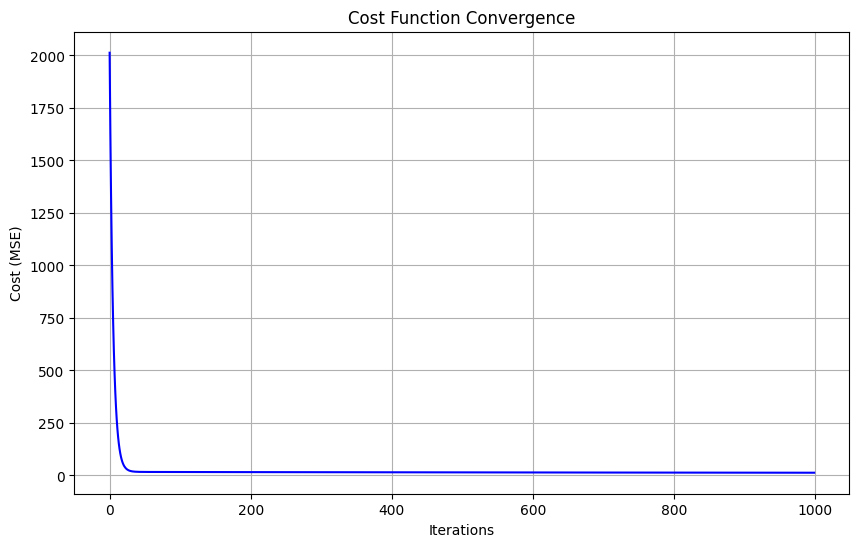

In [78]:
import matplotlib.pyplot as plt

def plot_cost(cost_history):
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(cost_history)), cost_history, color='blue')
    plt.title('Cost Function Convergence')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.grid(True)
    plt.show()

plot_cost(cost_history)

The model's performance is acceptable and the cost function decreases smoothly indicating proper convergence. The RMSE value being around 5.28 shows that the prediction error is low and R-squared value of approx 0.89 indicates that the model explains most of the variance in writing marks. Therefore, the model neither underfits nor overfits the data.

### 2. Experiment with different value of learning rate, making it higher and lower, observe the result.

In [79]:
learning_rates = [0.000001, 0.00001, 0.0001]

for alpha in learning_rates:
    print("\nLearning rate:", alpha)

    W = np.zeros(X_train.shape[1])
    iterations = 1000

    W_optimal, cost_history = gradient_descent(
        X_train, Y_train, W, alpha, iterations
    )

    Y_pred = X_test @ W_optimal

    print("  Final Cost:", cost_history[-1])
    print("  RMSE:", rmse(Y_test, Y_pred))
    print("  R²:", r2(Y_test, Y_pred))


Learning rate: 1e-06
  Final Cost: 16.535602355147176
  RMSE: 5.856694748793876
  R²: 0.8629707528684534

Learning rate: 1e-05
  Final Cost: 13.150619992105618
  RMSE: 5.2798239764188635
  R²: 0.8886354462786421

Learning rate: 0.0001
  Final Cost: 10.26076310841341
  RMSE: 4.792607360540954
  R²: 0.908240340333986


According to the data above, as the learning rate increases from 0.000001 to 0.0001, the model shows improved convergence with decrease in final cost and RMSE and increase in R-Squared. Therefore, smaller learning rate results in slower convergence while moderate learning rate results in quicker covergence and is more effective but with bigger learning rate it might start to diverge.